In [89]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [90]:
df=pd.read_csv('/content/dataset.csv')

In [91]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,06-02-2015 22:24,06-02-2015 23:27,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,10-02-2015 21:49,10-02-2015 22:56,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,22-01-2015 20:39,22-01-2015 21:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,03-02-2015 21:21,03-02-2015 22:13,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,15-02-2015 02:40,15-02-2015 03:20,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [92]:
df.shape

(99083, 14)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99083 entries, 0 to 99082
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   market_id                 98584 non-null  float64
 1   created_at                99083 non-null  object 
 2   actual_delivery_time      99080 non-null  object 
 3   store_id                  99083 non-null  object 
 4   store_primary_category    96792 non-null  object 
 5   order_protocol            98584 non-null  float64
 6   total_items               99083 non-null  int64  
 7   subtotal                  99083 non-null  int64  
 8   num_distinct_items        99083 non-null  int64  
 9   min_item_price            99083 non-null  int64  
 10  max_item_price            99083 non-null  int64  
 11  total_onshift_partners    90579 non-null  float64
 12  total_busy_partners       90578 non-null  float64
 13  total_outstanding_orders  90578 non-null  float64
dtypes: flo

In [94]:
from datetime import datetime

In [95]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'],errors='coerce')

In [96]:
df['time_taken'] = df['actual_delivery_time']- df['created_at']

In [97]:
df['time_taken_mins']=pd.to_timedelta(df['time_taken'])/pd.Timedelta('60s')

In [98]:
df['hour'] = df['created_at'].dt.hour
df['day'] = df['created_at'].dt.dayofweek

In [99]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken,time_taken_mins,hour,day
0,1.0,2015-06-02 22:24:00,2015-06-02 23:27:00,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,0 days 01:03:00,63.0,22,1
1,2.0,2015-10-02 21:49:00,2015-10-02 22:56:00,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,0 days 01:07:00,67.0,21,4
2,3.0,2015-01-22 20:39:00,2015-01-22 21:09:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,0 days 00:30:00,30.0,20,3
3,3.0,2015-03-02 21:21:00,2015-03-02 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,0 days 00:52:00,52.0,21,0
4,3.0,2015-02-15 02:40:00,2015-02-15 03:20:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,0 days 00:40:00,40.0,2,6


In [100]:
df.drop(['created_at','actual_delivery_time','time_taken','hour','day'],axis = 1, inplace= True)

In [101]:
df.isnull().sum()/ len(df) *100

market_id                   0.503618
store_id                    0.000000
store_primary_category      2.312203
order_protocol              0.503618
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      8.582703
total_busy_partners         8.583713
total_outstanding_orders    8.583713
time_taken_mins             0.003028
dtype: float64

In [102]:
df.shape

(99083, 13)

In [103]:
df.sample(5)

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_mins
75192,4.0,e2e5096d574976e8f115a8f1e0ffb52b,american,1.0,1,1299,1,1299,1299,62.0,61.0,91.0,37.0
24811,4.0,98f13708210194c475687be6106a3b84,mediterranean,2.0,3,2825,3,425,1450,62.0,73.0,41.0,37.0
91209,2.0,c31e46a74fb556fd7b53f8f6b186d5e9,mexican,5.0,2,1757,2,699,799,59.0,48.0,72.0,45.0
85943,5.0,99e7e6ce097324aceb45f98299ceb621,steak,1.0,3,3090,3,235,1695,8.0,7.0,7.0,32.0
4543,4.0,d0cbf1a1aa1726784df15a81ead214f7,greek,5.0,1,1499,1,999,999,89.0,86.0,159.0,70.0


<ipython-input-104-cc237ae2e9a5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis')


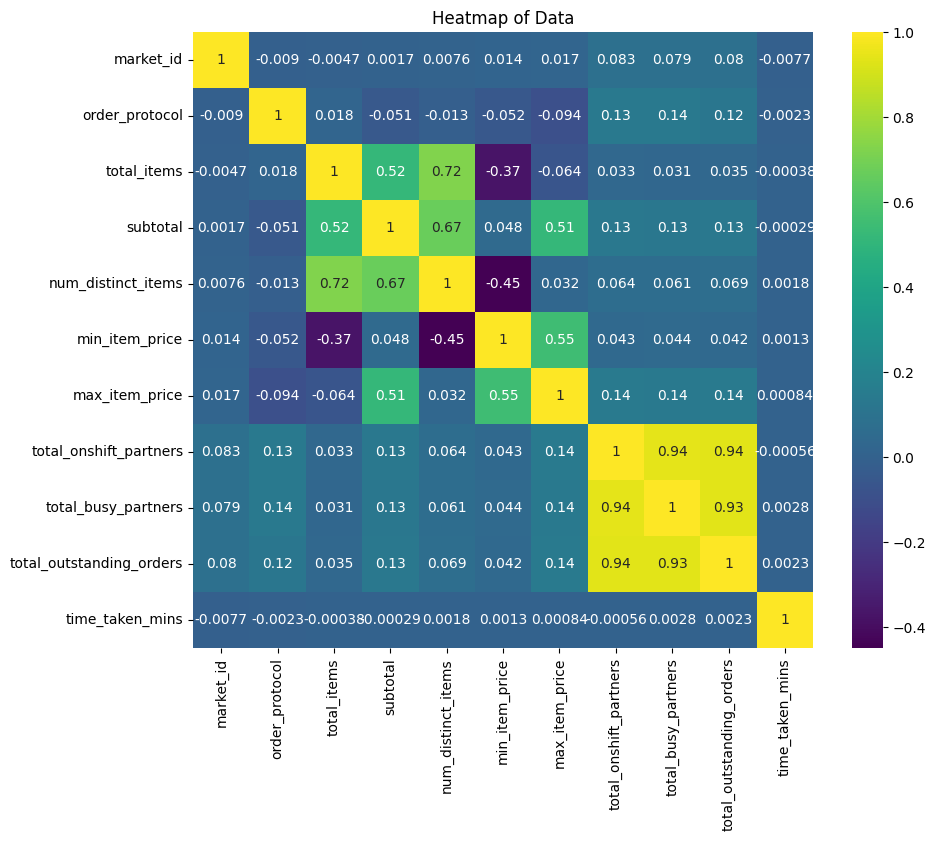

In [104]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Heatmap of Data')
plt.show()

In [105]:
drop_columns = ['market_id', 'store_id','order_protocol']
df.drop(columns=drop_columns, inplace=True)

In [106]:
df.duplicated().sum()

85

In [107]:
df.drop_duplicates(inplace = True)

In [108]:
df.duplicated().sum()

0

In [109]:
df.dropna(inplace=True)

In [110]:
df.isnull().sum()

store_primary_category      0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
time_taken_mins             0
dtype: int64

In [111]:
average_items_per_order = df['total_items'].mean()

print(f"Average Number of Items per Order: {average_items_per_order}")

Average Number of Items per Order: 3.2324219411187216


In [112]:
most_common_category = df['store_primary_category'].max()
print(f'the most common category is : {most_common_category}')

the most common category is : vietnamese


<ipython-input-113-2879f01edce8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='store_primary_category', data=df, palette='Set3')


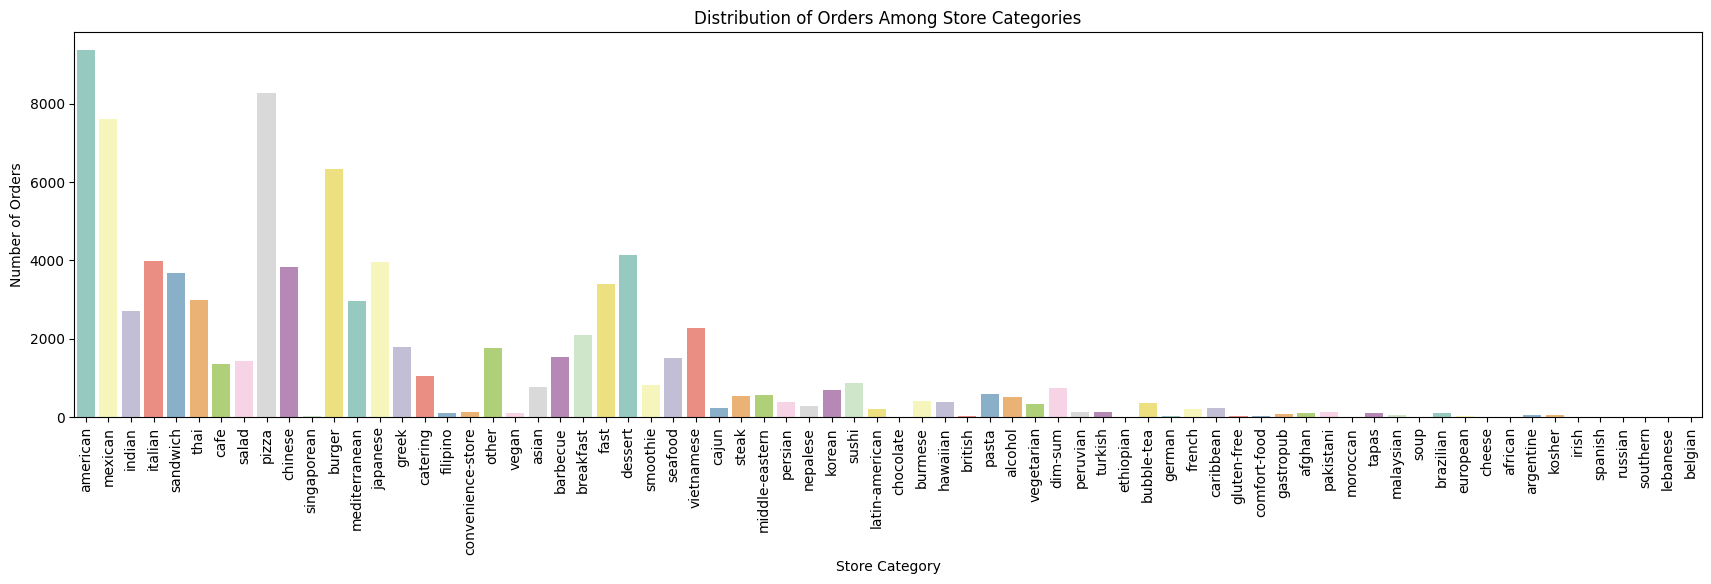

In [113]:
plt.figure(figsize=(21, 5))
sns.countplot(x='store_primary_category', data=df, palette='Set3')
plt.xlabel('Store Category')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders Among Store Categories')
plt.xticks(rotation=90)
plt.show()

In [114]:
average_per_order = df['total_items'].median()
print(f'Average order is :{average_per_order}')

Average order is :3.0


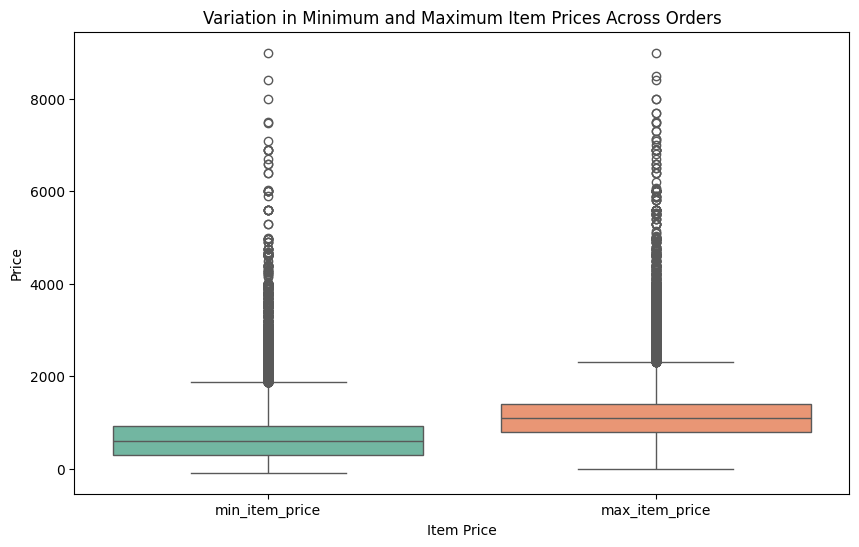

In [115]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['min_item_price', 'max_item_price']], palette='Set2')
plt.xlabel('Item Price')
plt.ylabel('Price')
plt.title('Variation in Minimum and Maximum Item Prices Across Orders')
plt.show()

In [116]:
df.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_mins
count,88619.000000,88619.000000,88619.000000,88619.000000,88619.000000,88619.000000,88619.000000,88619.000000,88619.000000
mean,3.232422,2719.111274,2.685192,686.724856,1173.238504,45.449825,42.318329,59.082917,69.696070
std,2.878096,1845.366954,1.627569,527.244706,576.578491,34.799398,32.279541,53.153983,14104.858648
min,1.000000,0.000000,1.000000,-86.000000,0.000000,-3.000000,-4.000000,-6.000000,-421900.000000
25%,2.000000,1427.000000,2.000000,299.000000,799.000000,17.000000,15.000000,17.000000,35.000000
50%,3.000000,2250.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,42.000000,45.000000
75%,4.000000,3450.000000,3.000000,929.000000,1400.000000,67.000000,63.000000,87.000000,57.000000
max,411.000000,22500.000000,20.000000,8999.000000,8999.000000,171.000000,154.000000,285.000000,43527.000000


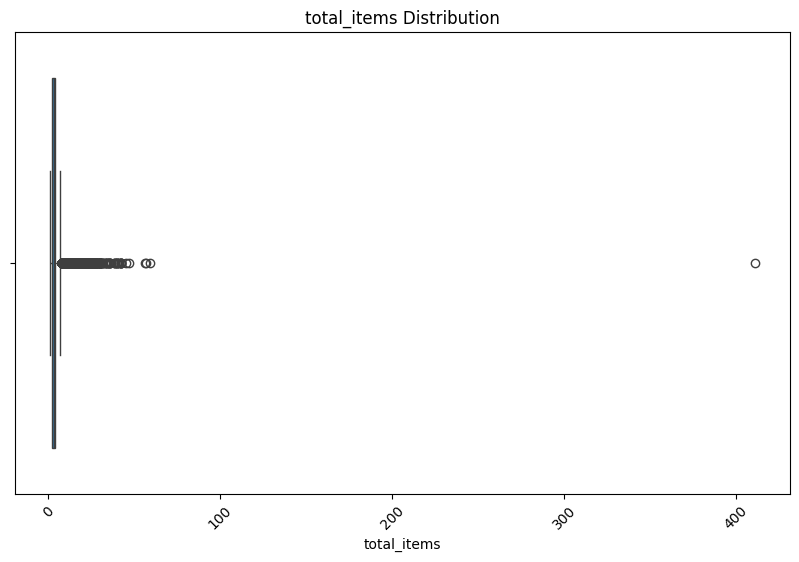

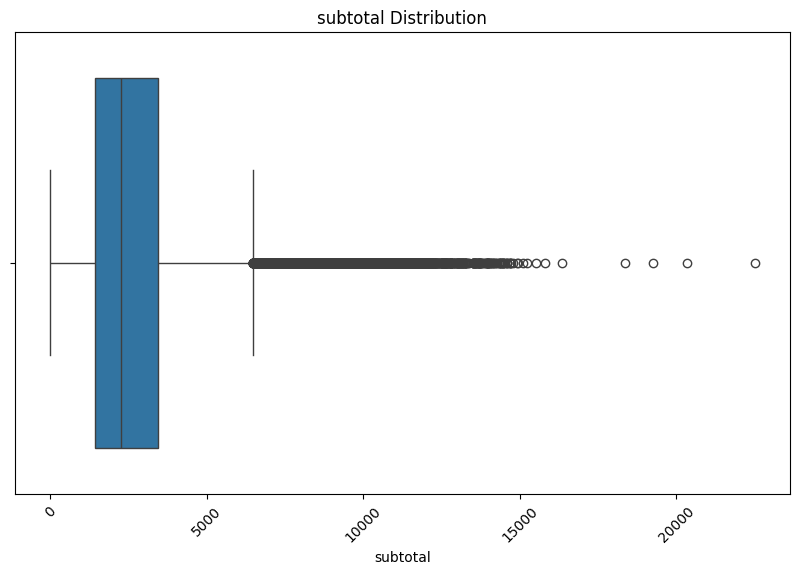

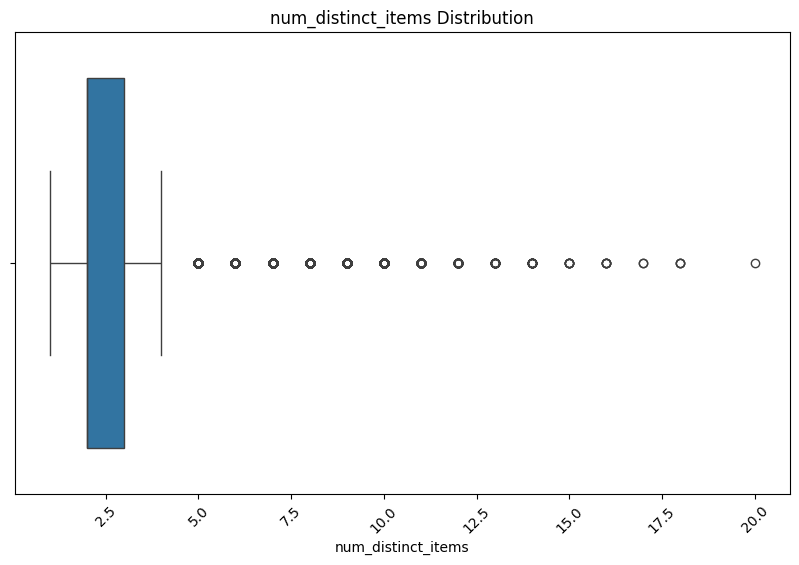

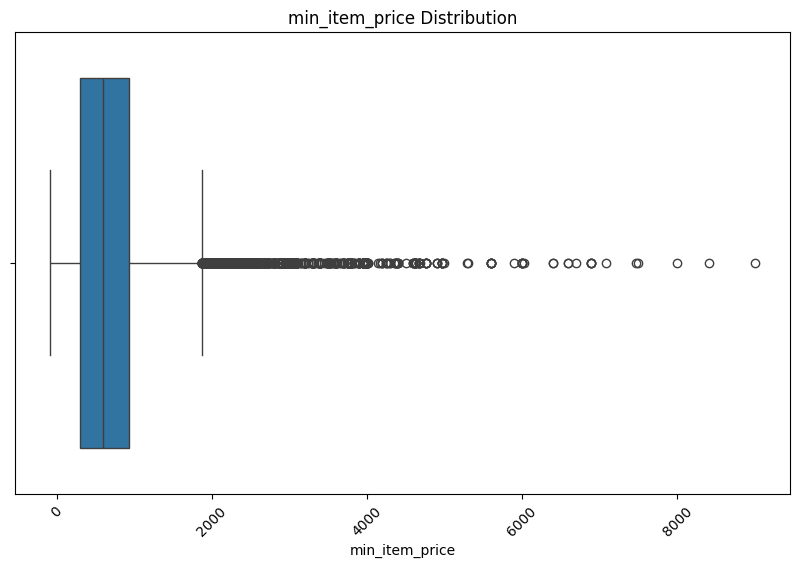

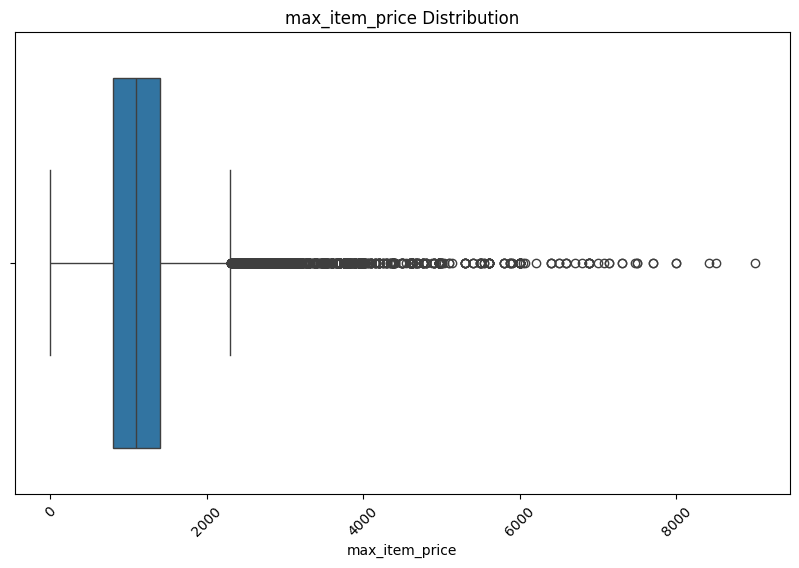

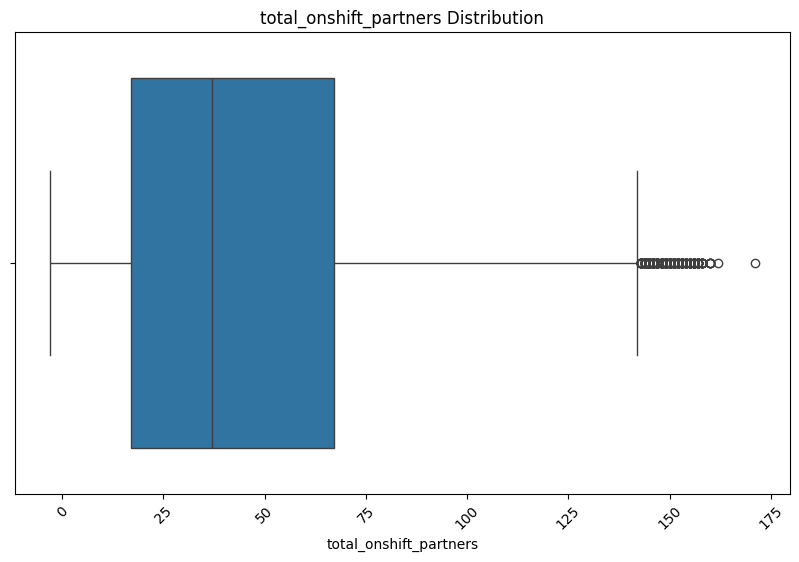

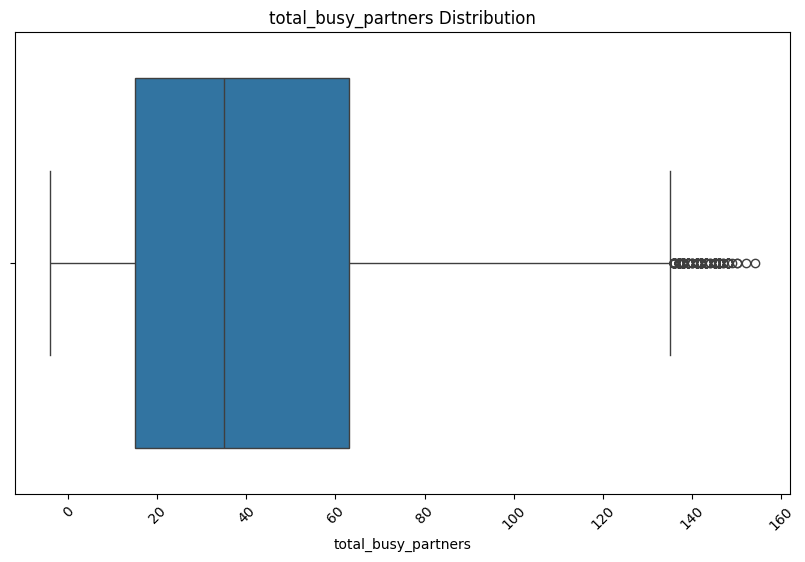

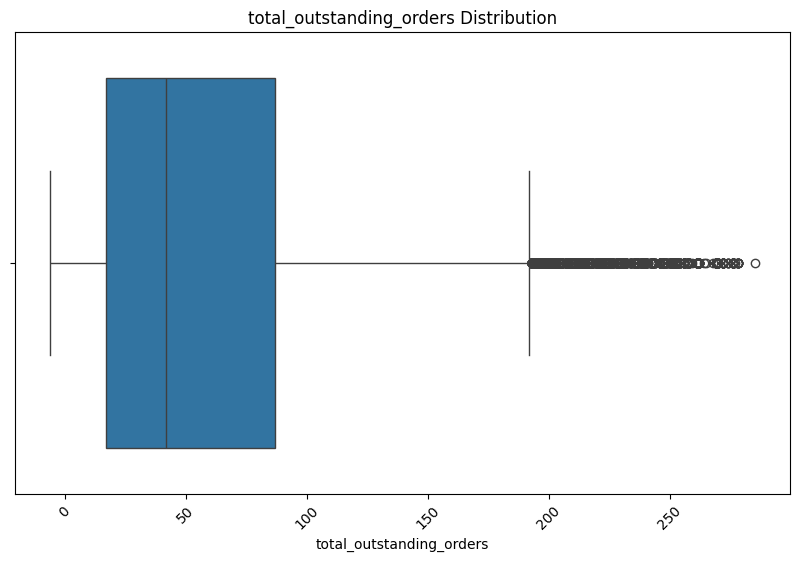

In [117]:
numerical_columns = ['total_items', 'subtotal', 'num_distinct_items','min_item_price','max_item_price','total_onshift_partners','total_busy_partners','total_outstanding_orders']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=45)
    plt.show()

In [118]:
# Finding the IQR
percentile25 = df[['total_items',	'subtotal',	'num_distinct_items' , 'min_item_price',	'max_item_price',	'total_onshift_partners',	'total_busy_partners',	'total_outstanding_orders']].quantile(0.25)
percentile75 = df[['total_items',	'subtotal',	'num_distinct_items' , 'min_item_price',	'max_item_price',	'total_onshift_partners',	'total_busy_partners',	'total_outstanding_orders']].quantile(0.75)

In [119]:
iqr = percentile75 - percentile25

In [120]:
iqr

total_items                    2.0
subtotal                    2023.0
num_distinct_items             1.0
min_item_price               630.0
max_item_price               601.0
total_onshift_partners        50.0
total_busy_partners           48.0
total_outstanding_orders      70.0
dtype: float64

In [121]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [122]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit total_items                    7.0
subtotal                    6484.5
num_distinct_items             4.5
min_item_price              1874.0
max_item_price              2301.5
total_onshift_partners       142.0
total_busy_partners          135.0
total_outstanding_orders     192.0
dtype: float64
Lower limit total_items                   -1.0
subtotal                   -1607.5
num_distinct_items             0.5
min_item_price              -646.0
max_item_price              -102.5
total_onshift_partners       -58.0
total_busy_partners          -57.0
total_outstanding_orders     -88.0
dtype: float64


In [123]:


df[['total_items',	'subtotal',	'num_distinct_items' , 'min_item_price',	'max_item_price',	'total_onshift_partners',	'total_busy_partners',	'total_outstanding_orders']] = np.where(
    df[['total_items',	'subtotal',	'num_distinct_items' , 'min_item_price',	'max_item_price',	'total_onshift_partners',	'total_busy_partners',	'total_outstanding_orders']] > upper_limit,
    upper_limit,
    np.where(
        df[['total_items',	'subtotal',	'num_distinct_items' , 'min_item_price',	'max_item_price',	'total_onshift_partners',	'total_busy_partners',	'total_outstanding_orders']] < lower_limit,
        lower_limit,
        df[['total_items',	'subtotal',	'num_distinct_items' , 'min_item_price',	'max_item_price',	'total_onshift_partners',	'total_busy_partners',	'total_outstanding_orders']]
    )
)

In [124]:
df.shape

(88619, 10)

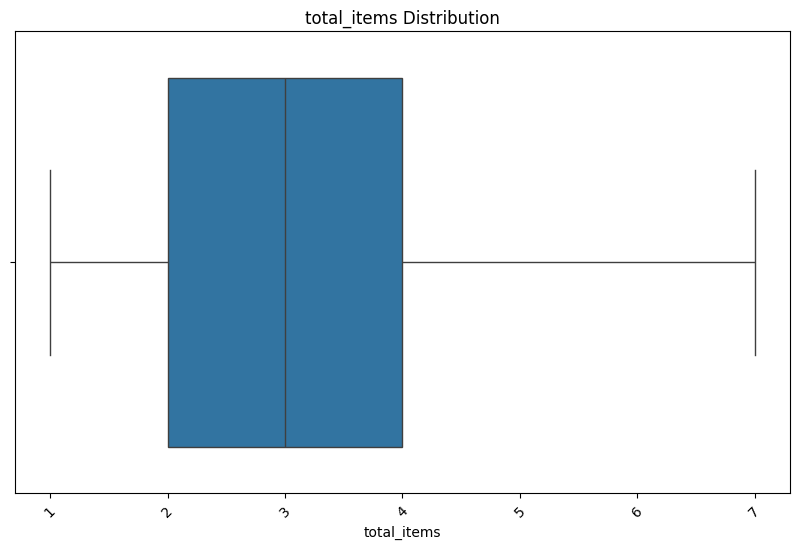

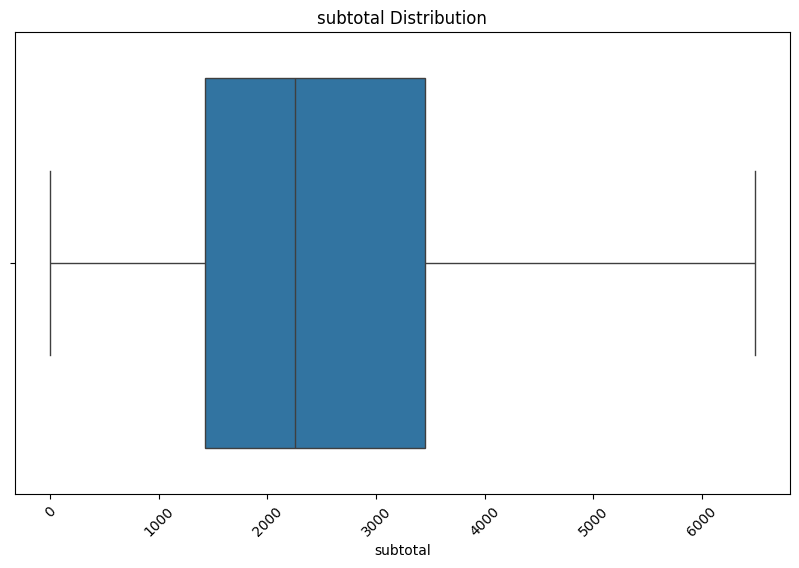

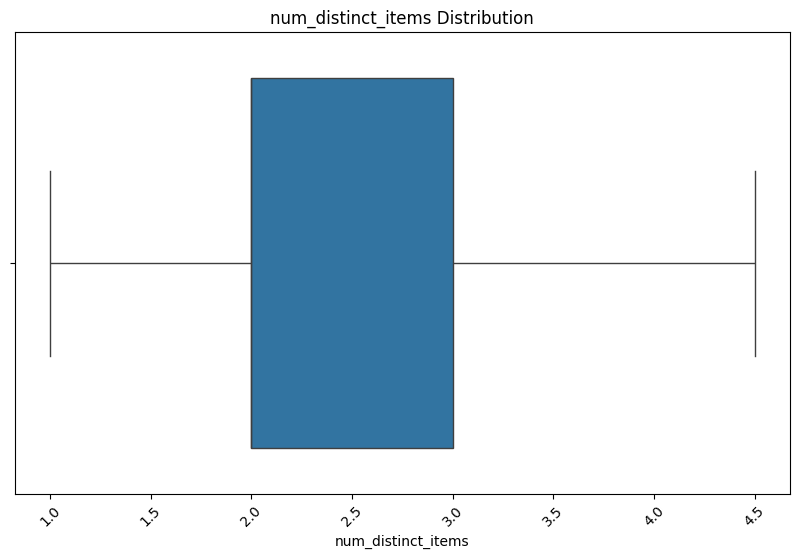

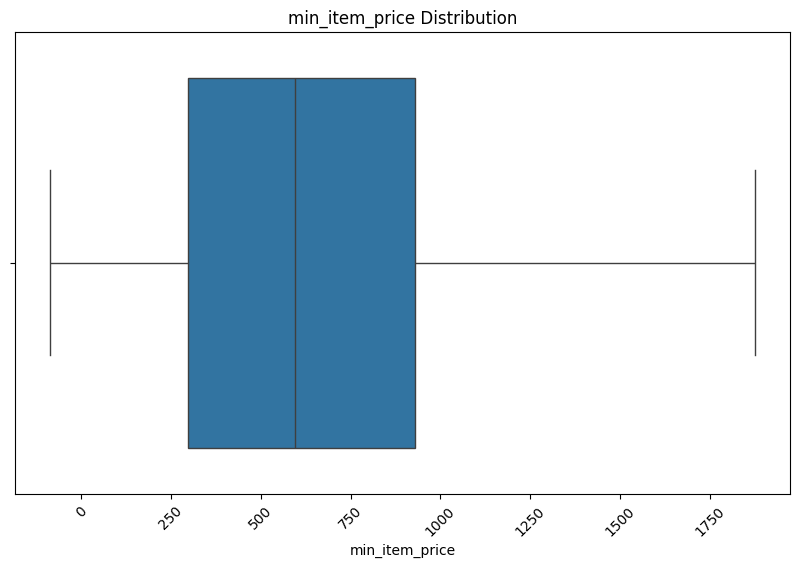

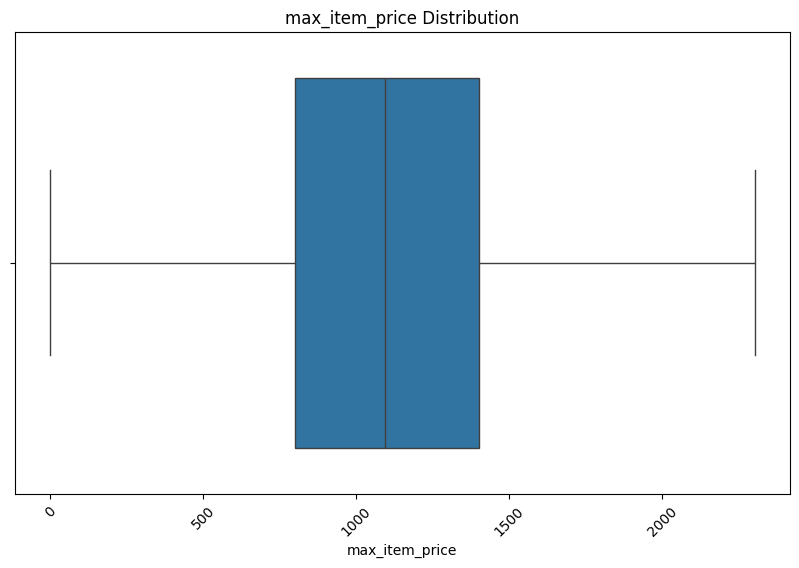

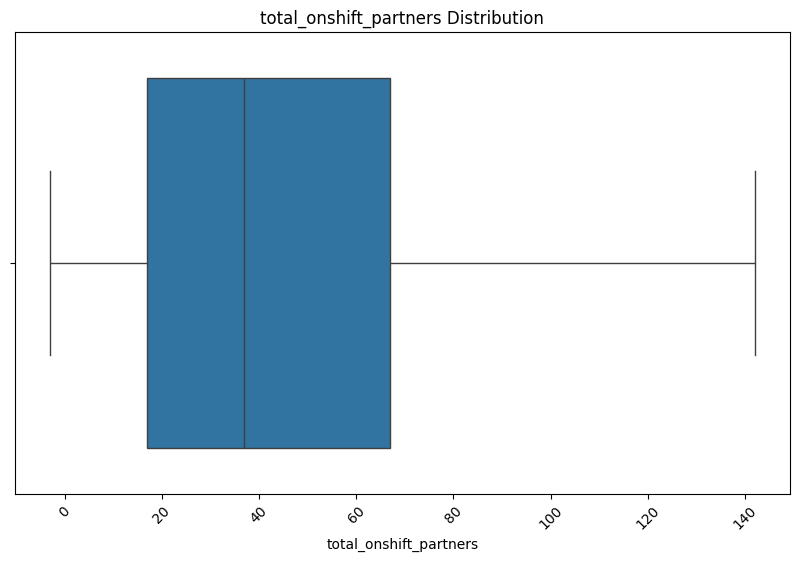

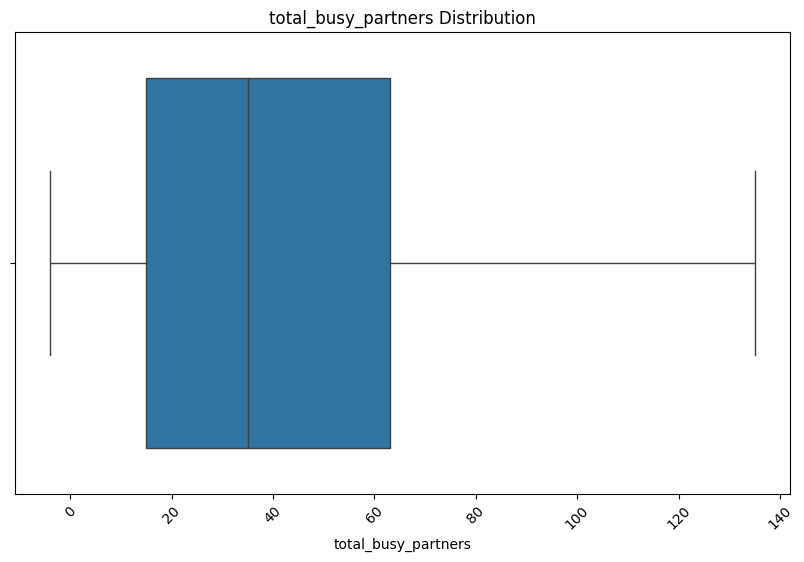

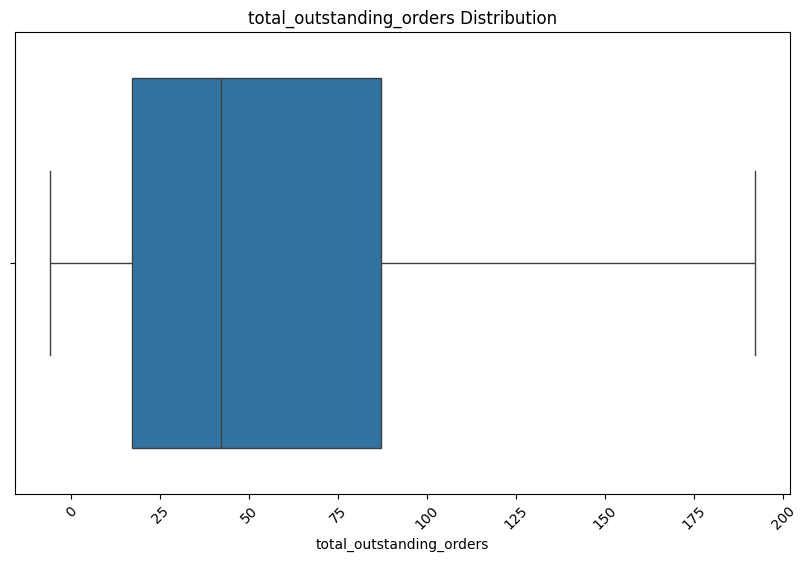

In [125]:
numerical_columns = ['total_items', 'subtotal', 'num_distinct_items','min_item_price','max_item_price','total_onshift_partners','total_busy_partners','total_outstanding_orders']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=45)
    plt.show()

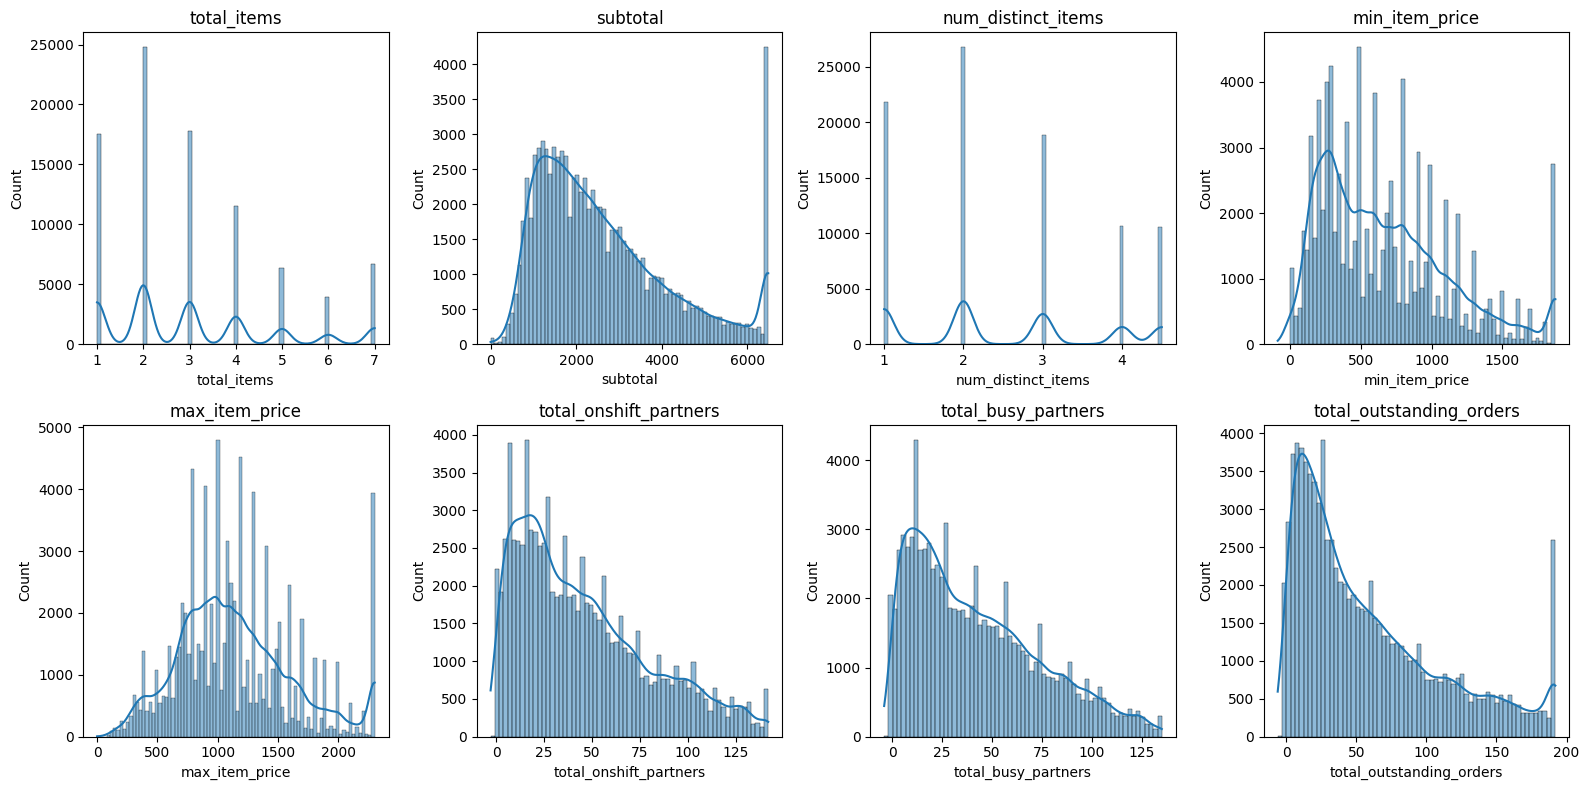

In [126]:


numerical_columns = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']

plt.figure(figsize=(16, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[column], kde=True)  # Using sns.histplot() instead of sns.distplot() as distplot() is deprecated
    plt.title(column)

plt.tight_layout()
plt.show()


In [127]:
X = df.drop('time_taken_mins',axis = 1)
y = df['time_taken_mins']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [129]:
ohe = OneHotEncoder(drop = 'first', sparse=False)

In [130]:
ohe.fit(X_train[['store_primary_category']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='first', sparse=False, sparse_output=False)

In [131]:
encoded_cols = list(ohe.get_feature_names_out())

In [132]:
X_train[encoded_cols] = ohe.transform(X_train[['store_primary_category']])
X_test[encoded_cols] = ohe.transform(X_test[['store_primary_category']])

In [133]:
X_train.drop('store_primary_category',axis=1,inplace=True)
X_test.drop('store_primary_category',axis=1,inplace=True)

In [134]:
X_train

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,store_primary_category_african,store_primary_category_alcohol,...,store_primary_category_southern,store_primary_category_spanish,store_primary_category_steak,store_primary_category_sushi,store_primary_category_tapas,store_primary_category_thai,store_primary_category_turkish,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese
98654,3.0,4177.0,3.0,499.0,1599.0,45.0,35.0,37.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91035,1.0,2350.0,1.0,1800.0,1800.0,23.0,23.0,27.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27600,3.0,2281.0,3.0,391.0,999.0,78.0,76.0,98.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57388,3.0,2145.0,2.0,695.0,725.0,52.0,53.0,92.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22384,3.0,557.0,2.0,79.0,399.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74562,2.0,1549.0,2.0,150.0,1299.0,33.0,33.0,76.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51721,1.0,995.0,1.0,845.0,845.0,16.0,14.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53881,1.0,875.0,1.0,675.0,675.0,19.0,19.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78417,1.0,2895.0,1.0,1874.0,2195.0,59.0,51.0,48.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
df

,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_mins
0,american,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,63.0
1,mexican,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,67.0
8,indian,4.0,4771.0,3.0,820.0,1604.0,8.0,6.0,18.0,27.0
14,italian,1.0,1525.0,1.0,1525.0,1525.0,5.0,6.0,8.0,38.0
15,italian,2.0,3620.0,2.0,1425.0,2195.0,5.0,5.0,7.0,50.0
...,...,...,...,...,...,...,...,...,...,...
99077,greek,3.0,4196.0,3.0,599.0,1799.0,103.0,78.0,96.0,53.0
99078,greek,5.0,3695.0,4.5,99.0,1099.0,109.0,106.0,170.0,55.0
99079,greek,4.0,3695.0,4.0,299.0,1299.0,95.0,96.0,165.0,68.0
99080,greek,2.0,2997.0,2.0,1199.0,1499.0,24.0,24.0,29.0,41815.0


In [136]:
columns_to_transform = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[columns_to_transform])
X_test_scaled = scaler.transform(X_test[columns_to_transform])


In [137]:
X_train_scaled

array([[-0.01750322,  0.9959446 ,  0.41456179, ..., -0.01165692,
        -0.22670324, -0.41783457],
       [-1.15489154, -0.18098546, -1.25879144, ..., -0.64640843,
        -0.59900389, -0.61205397],
       [-0.01750322, -0.22543438,  0.41456179, ...,  0.94047034,
         1.045324  ,  0.76690377],
       ...,
       [-1.15489154, -1.13116162, -1.25879144, ..., -0.7618178 ,
        -0.72310411, -0.82569531],
       [-1.15489154,  0.17009658, -1.25879144, ...,  0.39227585,
         0.26969763, -0.20419323],
       [-0.58619738, -0.2144832 , -0.42211483, ...,  0.5653899 ,
         0.45584796,  0.28135527]])

In [138]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [139]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",np.sqrt(mse))

Mean Squared Error: 15699.275162492137


In [140]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1258.560851420666


In [141]:
1077.411968925728/60

17.95686614876213

In [142]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import mean_absolute_error

# Define the pipeline
pipeline = make_pipeline(
    StandardScaler(),
    PowerTransformer(),
    Ridge()  # Ridge Regression with regularization
)

# Define the hyperparameters to tune
param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0]  # Regularization strength
}

# Perform grid search cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test_scaled)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Best Mean Absolute Error after hyperparameter tuning:", mae)

# Get the best hyperparameters
best_parameters = grid_search.best_params_
print("Best Hyperparameters:", best_parameters)


Best Mean Absolute Error after hyperparameter tuning: 1379.686116140856
Best Hyperparameters: {'ridge__alpha': 10.0}


In [143]:

from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')

# Convert scores to positive values
cv_scores = -cv_scores

# Print cross-validation scores
print("Cross-Validation Mean Absolute Error Scores:", cv_scores)
print("Average Mean Absolute Error:", cv_scores.mean())

Cross-Validation Mean Absolute Error Scores: [1397.23300687 1085.784855   1138.88225091 1350.69764674 1070.57299936]
Average Mean Absolute Error: 1208.634151775375
